In [1]:
import tensorflow 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding,Activation,Dropout
from tensorflow.keras.layers import Conv1D, MaxPool1D, GlobalAveragePooling1D
import numpy as np 
from numpy import array 
import pandas as pd

In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [165]:
df=pd.read_csv(r"C:\Users\pbann\Downloads\training.1600000.processed.noemoticon.csv\training.1600000.processed.noemoticon.csv",encoding_errors= 'replace',header=None)

In [166]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [167]:
df=df[[5,0]]
df

,5,0
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [168]:
df.columns=['twitts','sentiment']
df.head()

,twitts,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [169]:
df['word_count']=df['twitts'].apply(lambda x: len(str(x).split()))

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/4033468041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count']=df['twitts'].apply(lambda x: len(str(x).split()))


In [170]:
df

,twitts,sentiment,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21
...,...,...,...
1599995,Just woke up. Having no school is the best fee...,4,11
1599996,TheWDB.com - Very cool to hear old Walt interv...,4,11
1599997,Are you ready for your MoJo Makeover? Ask me f...,4,11
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4,12


In [34]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [35]:
sent_map = {0:'negative',4:'positive'}

In [36]:
# character count
df['charcter_count']=df['twitts'].apply(lambda x : len(x))

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/1137388034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['charcter_count']=df['twitts'].apply(lambda x : len(x))


In [37]:
def avg_word_len(text):
    words=text.split()
    word_len=0
    for word in words:
        word_len=word_len+len(words)
    return word_len/len(words)
    

In [38]:
# avg wordlength 
df['avg_word_len']=df['twitts'].apply(lambda x:avg_word_len(x) )

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/2473880090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_word_len']=df['twitts'].apply(lambda x:avg_word_len(x) )


In [39]:
df

,twitts,sentiment,word_count,charcter_count,avg_word_len
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,19.0
1,is upset that he can't update his Facebook by ...,0,21,111,21.0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,18.0
3,my whole body feels itchy and like its on fire,0,10,47,10.0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,21.0
...,...,...,...,...,...
1599995,Just woke up. Having no school is the best fee...,4,11,56,11.0
1599996,TheWDB.com - Very cool to hear old Walt interv...,4,11,76,11.0
1599997,Are you ready for your MoJo Makeover? Ask me f...,4,11,57,11.0
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4,12,65,12.0


# stop words count

In [40]:
print(STOP_WORDS)

{'more', 'becomes', 'had', 'beforehand', 'not', 'as', 'a', 'rather', 'to', 'give', 'been', 'below', 'hence', 'almost', 'still', 'can', 'the', 'during', 'whereafter', 'cannot', 'much', 'seeming', 'afterwards', "'m", 'off', 'full', 'please', 'towards', 'our', 'less', 'me', '’ll', 'top', 'make', 'always', 'via', 'former', 'five', 'noone', 'last', 'since', 'across', 'himself', 'else', 'whereupon', 'doing', 'namely', 'take', 'together', 'used', 'beside', 'does', 'various', 'if', 'often', 'say', 'other', 'already', 'see', 'empty', 'those', 'sometime', 'these', 'something', 'for', '’d', "'s", 'done', 'out', 'by', 'you', 'neither', 'sometimes', 'upon', 'whoever', 'wherein', 'ca', 'latter', 'amongst', "'ve", 'move', 'mostly', 'became', 'using', 'everyone', 'that', 'unless', 'without', 'nevertheless', 'formerly', 'amount', 'how', 'be', 'quite', '‘ll', 'therefore', 'wherever', 'is', 'whereas', 'regarding', 'ourselves', 'seemed', 'too', 'they', 'of', 'again', 'indeed', 'could', 'than', 'into', 'it

In [41]:
df['stopwords_len']=df['twitts'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))

In [42]:
# how many stop words in each row of data

In [43]:
# count hastags and @ mentions
df['hashtag_counts']=df['twitts'].apply(lambda x :len([t for t in x.split() if t.startswith('#')]))
df['mentions_counts']=df['twitts'].apply(lambda x :len([t for t in x.split() if t.startswith('@')]))

In [44]:
# if numeric digits present in tweet
df['numerics_counts']=df['twitts'].apply(lambda x : len([t for t in x.split() if t.isdigit()]))

In [45]:
# upper case words count
df['upper_case_counts']=df['twitts'].apply(lambda x: len([t for t in x.split() if  t.isupper() and len(x)>3]))

In [46]:
df.loc[96]['twitts']

"so rylee,grace...wana go steve's party or not?? SADLY SINCE ITS EASTER I WNT B ABLE 2 DO MUCH  BUT OHH WELL....."

# preprocessing and cleaning

In [171]:
df['twitts']=df['twitts'].apply(lambda x : x.lower())


C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/2081995807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts']=df['twitts'].apply(lambda x : x.lower())


In [172]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and "}

In [173]:
# #!pip install contractions
# # contraction to expansion:
# import contractions
# def cont_to_exp(text):
#     for word in text.split():
  # using contractions.fix to expand the shortened words
 #    contractions.fix(word)
# df['twitts'].apply(lambda x: )

In [174]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x
   


In [175]:
df['twitts']=df['twitts'].apply(lambda x : cont_to_exp(x))

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/1896966901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts']=df['twitts'].apply(lambda x : cont_to_exp(x))


In [176]:
# count and remove emails

In [53]:
import re 

In [54]:
df['emails']=df['twitts'].apply(lambda x : re.findall(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)',x) )

In [55]:
df['email_count']=df['emails'].apply(lambda x : len(x))

In [56]:
df[df['email_count']>0]

,twitts,sentiment,word_count,charcter_count,avg_word_len,stopwords_len,hashtag_counts,mentions_counts,numerics_counts,upper_case_counts,emails,email_count
4054,i want a new laptop. hp tx2000 is the bomb. :...,0,20,103,20.0,6,0,0,0,4,[gabbehhramos@yahoo.com],1
7917,who stole elledell@gmail.com?,0,3,31,3.0,1,0,0,0,0,[elledell@gmail.com],1
8496,@alexistehpom really? did you send out all th...,0,20,130,20.0,11,0,1,0,0,[missataari@gmail.com],1
10290,@laureystack awh...that is kinda sad lol add ...,0,8,76,8.0,0,0,1,0,0,[hello.kitty.65@hotmail.com],1
16413,"@jilliancyork got 2 bottom of it, human error...",0,21,137,21.0,7,0,1,1,0,[press@linkedin.com],1
...,...,...,...,...,...,...,...,...,...,...,...,...
1588338,@boudoirsextoys do not forget to shoot me an e...,4,21,127,21.0,10,0,1,0,1,[hello@tastelikekisses.com],1
1589132,"hi there , anybody got a job for me oil &amp;...",4,15,98,15.0,4,0,0,0,0,[aadvanspijk@yahoo.co.uk],1
1590489,"@clericaaron yes, lbruton@tulsalanparty.com is...",4,14,95,14.0,6,0,1,0,1,[lbruton@tulsalanparty.com],1
1591675,@miss_ellen good morning!!!! congrats! se...,4,9,77,9.0,2,0,1,0,0,[jill@q985fm.com],1


In [177]:
df['twitts']=df['twitts'].apply(lambda x : re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', '',x) )

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/2169647974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts']=df['twitts'].apply(lambda x : re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9+._-]+\.[a-zA-Z0-9+._-]+)', '',x) )


In [178]:
df[df['email_count']>0] # emails are removed

KeyError: 'email_count'

In [ ]:
# count urls and remove

In [36]:
re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)

NameError: name 'x' is not defined

In [60]:
df['URL_counts']=df['twitts'].apply(lambda x: re.findall(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x))

In [179]:
df['twitts']=df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ',x))

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/3246979182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts']=df['twitts'].apply(lambda x: re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ',x))


In [62]:
df

,twitts,sentiment,word_count,charcter_count,avg_word_len,stopwords_len,hashtag_counts,mentions_counts,numerics_counts,upper_case_counts,emails,email_count,URL_counts
0,"@switchfoot - awww, that is a bummer. you s...",0,19,115,19.0,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]"
1,is upset that he cannot update his facebook by...,0,21,111,21.0,9,0,0,0,0,[],0,[]
2,@kenichan i dived many times for the ball. man...,0,18,89,18.0,7,0,1,0,1,[],0,[]
3,my whole body feels itchy and like its on fire,0,10,47,10.0,5,0,0,0,0,[],0,[]
4,"@nationwideclass no, it is not behaving at all...",0,21,111,21.0,10,0,1,0,1,[],0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,just woke up. having no school is the best fee...,4,11,56,11.0,4,0,0,0,0,[],0,[]
1599996,thewdb.com - very cool to hear old walt interv...,4,11,76,11.0,1,0,0,0,0,[],0,"[(http, blip.fm, /~8bmta)]"
1599997,are you ready for your mojo makeover? ask me f...,4,11,57,11.0,5,0,0,0,0,[],0,[]
1599998,happy 38th birthday to my boo of alll time!!! ...,4,12,65,12.0,3,0,0,0,0,[],0,[]


In [63]:
df.loc[0]['twitts']

'@switchfoot   - awww, that is a bummer.  you shoulda got david carr of third day to do it. ;d'

## RT = retweet removal

In [180]:
df['twitts']=df['twitts'].apply(lambda x: re.sub('RT','',x))

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/1011988065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts']=df['twitts'].apply(lambda x: re.sub('RT','',x))


# special character or punctuation removal

In [183]:
df['twitts']=df['twitts'].apply(lambda x: re.sub('[^a-z A-Z 0-9]+','',x))

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/869096427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts']=df['twitts'].apply(lambda x: re.sub('[^a-z A-Z 0-9]+','',x))


# remove multiple spaces like: "hi    hello this     "

In [66]:
x= 'he  is  the  good  one '

In [67]:
" ".join(x.split())

'he is the good one'

In [184]:
df['twitts']=df['twitts'].apply(lambda x: " ".join(x.split()))

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/1105444693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts']=df['twitts'].apply(lambda x: " ".join(x.split()))


# remove HTML tags:

In [69]:
from bs4 import BeautifulSoup

In [70]:
x="<html><h2>Thanks for watching</h2></html>"

In [71]:
BeautifulSoup(x,'lxml').get_text()

'Thanks for watching'

In [185]:
%%time
df['twitts']=df['twitts'].apply(lambda x:BeautifulSoup(x,'lxml').get_text() )

Wall time: 5min 16s


<timed exec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [186]:
df

,twitts,sentiment,word_count
0,switchfoot awww that is a bummer you shoulda g...,0,19
1,is upset that he cannot update his facebook by...,0,21
2,kenichan i dived many times for the ball manag...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,nationwideclass no it is not behaving at all i...,0,21
...,...,...,...
1599995,just woke up having no school is the best feel...,4,11
1599996,thewdbcom very cool to hear old walt interviews,4,11
1599997,are you ready for your mojo makeover ask me fo...,4,11
1599998,happy 38th birthday to my boo of alll time tup...,4,12


# remove accented characters

In [74]:
x = 'ÁêÝÆ' # alt+0193 gives A , this type of letters are called accented charcters

In [75]:
import unicodedata

In [76]:
def remove_accented_chars(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [188]:
df['twitts']=df['twitts'].apply(lambda x: remove_accented_chars(x))

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/1806300195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts']=df['twitts'].apply(lambda x: remove_accented_chars(x))


# remove stop words

In [78]:
import spacy

In [79]:
x = 'this is a stop word removal code'
" ".join([t for t in x.split() if t not in STOP_WORDS])

'stop word removal code'

In [189]:
df['twitts']=df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/3380690150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twitts']=df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in STOP_WORDS]))


In [190]:
df.head(2)

,twitts,sentiment,word_count
0,switchfoot awww bummer shoulda got david carr ...,0,19
1,upset update facebook texting cry result schoo...,0,21


# converting into base form

In [82]:
nlp = spacy.load('en_core_web_sm')

In [83]:
x='upset update facebook texting cry result schoo'
# this step is to remove all words those are carrying same meaning but in diff tense,count or meaning

In [84]:
x='i you he she they is am are'

In [85]:
def make_base(x):
    x_list=[]
    doc =nlp(x)
    for token in doc:
        lemma = str(token.lemma_)
        if lemma=='-PRON-' or lemma=='be':
            lemma=token.text
        x_list.append(lemma)
    print(" ".join(x_list))

In [86]:
make_base(x)

I you he she they is am are


In [88]:
make_base(x)

upset update facebook texting cry result schoo


In [90]:
#df['twitts']=df['twitts'].apply(lambda x:make_base(x))

# common words removal

In [87]:
' '.join(df.head()['twitts'])

'switchfoot awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad'

In [88]:
text = " ".join(df['twitts'])

In [89]:
text = text.split()

In [90]:
freq_comm=pd.Series(text).value_counts()

In [91]:
f20=freq_comm[:20]
f20

good      89404
day       82375
like      77749
today     64611
going     64090
love      63473
work      62848
got       60753
time      56111
lol       55152
know      51197
im        50161
want      42072
new       41998
night     41069
think     41045
amp       40632
thanks    39344
home      39200
oh        37992
dtype: int64

# removing most frequent words

In [92]:
df['twitts']=df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in f20]))

# remove rare occuring words removal

In [93]:
rare20=freq_comm[-20:]
rare20

piecesit           1
danb2666           1
hornyfurniture     1
thepheasant        1
beginspity         1
overlong           1
niteboth           1
bordognis          1
alongslowly        1
aartikalha         1
todayfiguresit     1
mauy               1
trinacharms        1
caigo              1
richardshepherd    1
day86good          1
ughworki           1
biebob             1
sryhe              1
speakinguph4h      1
dtype: int64

In [94]:
rare=freq_comm[freq_comm.values ==1]

In [95]:
df['twitts']=df['twitts'].apply(lambda x: " ".join([t for t in x.split() if t not in rare20]))

In [96]:
df

,twitts,sentiment,word_count,charcter_count,avg_word_len,stopwords_len,hashtag_counts,mentions_counts,numerics_counts,upper_case_counts,emails,email_count,URL_counts
0,switchfoot awww bummer shoulda david carr d,0,19,115,19.0,4,0,1,0,1,[],0,"[(http, twitpic.com, /2y1zl)]"
1,upset update facebook texting cry result schoo...,0,21,111,21.0,9,0,0,0,0,[],0,[]
2,kenichan dived times ball managed save 50 rest...,0,18,89,18.0,7,0,1,0,1,[],0,[]
3,body feels itchy fire,0,10,47,10.0,5,0,0,0,0,[],0,[]
4,nationwideclass behaving mad,0,21,111,21.0,10,0,1,0,1,[],0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,woke having school best feeling,4,11,56,11.0,4,0,0,0,0,[],0,[]
1599996,thewdbcom cool hear old walt interviews,4,11,76,11.0,1,0,0,0,0,[],0,"[(http, blip.fm, /~8bmta)]"
1599997,ready mojo makeover ask details,4,11,57,11.0,5,0,0,0,0,[],0,[]
1599998,happy 38th birthday boo alll tupac amaru shakur,4,12,65,12.0,3,0,0,0,0,[],0,[]


# word cloud visualization

In [110]:
#!pip install wordcloud

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
x=" ".join(text[:20000])
len(text)

10761087

In [117]:
x

'switchfoot awww bummer shoulda got david carr day d upset update facebook texting cry result school today blah kenichan dived times ball managed save 50 rest bounds body feels itchy like fire nationwideclass behaving mad kwesidei crew need hug loltrish hey long time yes rains bit bit lol fine thanks tatianak nope twittera que muera spring break plain city snowing repierced ears caregiving bear watch thought ua loss embarrassing octolinz16 counts idk talk anymore smarrison wouldve gun zac snyders doucheclown iamjazzyfizzle wish got watch miss iamlilnicki premiere hollis death scene hurt severely watch film wry directors cut file taxes lettya ahh ive wanted rent love soundtrack fakerpattypattz oh dear drinking forgotten table drinks alydesigns day friend called asked meet mid valley todaybut time sigh angrybarista baked cake ated week going hoped blagh class 8 tomorrow hate wake people going cry sleep watching marley im sad misslilly ooooh lol leslie ok wont leslie wont mad meh lover ex

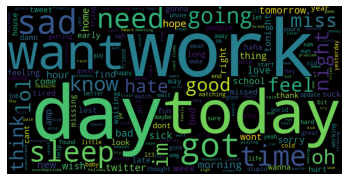

In [116]:
wc=WordCloud(width=800, height=400).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()


# spelling correction

In [120]:
#!python -m textblob.download_corpora
from textblob import TextBlob

In [136]:
x = 'tanks #forr wattchingg this video.'

In [126]:
x = TextBlob(x).correct()

In [127]:
x

TextBlob("tanks for watching this video")

# Tokenization

In [137]:
TextBlob(x).words

WordList(['tanks', 'forr', 'wattchingg', 'this', 'video'])

In [138]:
doc = nlp(x)
for token in doc: 
    print(token)

tanks
#
forr
wattchingg
this
video
.


# lemmatization

In [144]:
x = 'runs run running and will have ran'

In [145]:
from textblob import Word

In [146]:
for token in x.split():
    print(Word(token).lemmatize())

run
run
running
and
will
have
ran


In [148]:
doc = nlp(x)
for token in doc:
    print(token.lemma_)

run
run
run
and
will
have
run


# detecting Entities NER of spacy

In [152]:
x = "Breaking news:Narendra Modi has become the Prime minister of India"

In [153]:
doc = nlp(x)
for ent in doc.ents:
    print(ent.text+'-'+ent.label_+'-'+str(spacy.explain(ent.label_)))

Narendra Modi-PERSON-People, including fictional
India-GPE-Countries, cities, states


In [154]:
from spacy import displacy
displacy.render(doc,style='ent')

# Detecting nouns

In [158]:
for noun in doc.noun_chunks:
    print(noun)

Breaking news
Narendra Modi
the Prime minister
India


# Translation and Language detection

## Language Code: https://www.loc.gov/standards/iso639-2/php/code_list.php

In [166]:
x= 'Breaking News: Donald Trump, the president of the USA is looking to sign a deal to mine the moon'
tb = TextBlob(x)
tb.detect_language()


HTTPError: HTTP Error 400: Bad Request

In [163]:
tb.detect_language()

HTTPError: HTTP Error 400: Bad Request

In [167]:
tb.translate(to='tel')

AttributeError: 'list' object has no attribute 'strip'

# Use inbuilt sentiment classifier

In [169]:
x = 'we all have to unite to fight with Corona virus.'

In [171]:
from textblob.sentiments import NaiveBayesAnalyzer 
tb = TextBlob(x, analyzer=NaiveBayesAnalyzer())

In [172]:
tb.sentiment

Sentiment(classification='pos', p_pos=0.8697228421832339, p_neg=0.1302771578167655)

In [173]:
y='we all are suffering from corona'

In [174]:
from textblob.sentiments import NaiveBayesAnalyzer 
tb = TextBlob(y, analyzer=NaiveBayesAnalyzer())
tb.sentiment

Sentiment(classification='pos', p_pos=0.8530393643704917, p_neg=0.1469606356295085)

#### Observation: though it is negative algo shows as positive so need to develop own sentiment analyser

# Advanced text processing

In [175]:
x = 'thanks for watching my video'

In [176]:
tb = TextBlob(x)

In [177]:
tb.ngrams(1)

[WordList(['thanks']),
 WordList(['for']),
 WordList(['watching']),
 WordList(['my']),
 WordList(['video'])]

In [178]:
tb.ngrams(3)

[WordList(['thanks', 'for', 'watching']),
 WordList(['for', 'watching', 'my']),
 WordList(['watching', 'my', 'video'])]

# Bag of Words

In [190]:
x = ['This is first sentence this is', 'this is second', 'this is last is' ]

In [191]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1))
text_counts = cv.fit_transform(x)

In [192]:
text_counts

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [193]:
text_counts.toarray()

array([[1, 2, 0, 0, 1, 2],
       [0, 1, 0, 1, 0, 1],
       [0, 2, 1, 0, 0, 1]], dtype=int64)

In [194]:
bow = pd.DataFrame(text_counts.toarray(), columns= cv.get_feature_names())

C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [195]:
bow

,first,is,last,second,sentence,this
0,1,2,0,0,1,2
1,0,1,0,1,0,1
2,0,2,1,0,0,1


# term frequency : 
### Term frequency (TF) often used in Text Mining, NLP, and Information Retrieval tells you how frequently a term occurs in a document. In the context of natural language, terms correspond to words or phrases. Since every document is different in length, it is possible that a term would appear more often in longer documents than shorter ones. Thus, term frequency is often divided by the total number of terms in the document as a way of normalization.

### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

In [196]:
tf=bow/bow.shape[1]

In [197]:
tf = bow.copy()
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index, col] = tf.loc[index, col]/sum(row[1].values)

In [198]:
tf

,first,is,last,second,sentence,this
0,0.166667,0.333333,0.00,0.000000,0.166667,0.333333
1,0.000000,0.333333,0.00,0.333333,0.000000,0.333333
2,0.000000,0.500000,0.25,0.000000,0.000000,0.250000


In [199]:
import numpy as np
x_df = pd.DataFrame(x, columns=['words'])
x_df

,words
0,This is first sentence this is
1,this is second
2,this is last is


In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x_df['words'])

In [201]:
x_tfidf.toarray()

array([[0.45688214, 0.5396839 , 0.        , 0.        , 0.45688214,
        0.5396839 ],
       [0.        , 0.45329466, 0.        , 0.76749457, 0.        ,
        0.45329466],
       [0.        , 0.71307037, 0.60366655, 0.        , 0.        ,
        0.35653519]])

# Word to Vec : Word embeddings
## spacy word2vec

In [241]:
#!python -m spacy download en_core_web_lg
nlp = spacy.load('en_core_web_lg')

In [206]:
doc = nlp('Thank you! dog cat and lion')

In [208]:
for token in doc:
    print(token.text, token.has_vector)

Thank True
you True
! True
dog True
cat True
and True
lion True


In [211]:
token.vector.shape

(300,)

In [212]:
nlp('cat').vector.shape

(300,)

In [213]:
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))
    print()

Thank Thank 1.0
Thank you 0.19567038118839264
Thank ! 0.32500508427619934
Thank dog 0.07719222456216812
Thank cat 0.04961059242486954
Thank and -0.07510451972484589
Thank lion -0.19235652685165405

you Thank 0.19567038118839264
you you 1.0
you ! 0.3429550528526306
you dog 0.34409627318382263
you cat 0.27984926104545593
you and 0.06746923923492432
you lion 0.05796932056546211

! Thank 0.32500508427619934
! you 0.3429550528526306
! ! 1.0
! dog 0.2505742013454437
! cat 0.20256751775741577
! and 0.037219975143671036
! lion -0.032366640865802765

dog Thank 0.07719222456216812
dog you 0.34409627318382263
dog ! 0.2505742013454437
dog dog 1.0
dog cat 0.8220816850662231
dog and 0.02349545620381832
dog lion 0.29493075609207153

cat Thank 0.04961059242486954
cat you 0.27984926104545593
cat ! 0.20256751775741577
cat dog 0.8220816850662231
cat cat 1.0
cat and -0.08736970275640488
cat lion 0.3854507803916931

and Thank -0.07510451972484589
and you 0.06746923923492432
and ! 0.037219975143671036
and d

# MAchine learning models for text classification

In [97]:
df.shape

(1600000, 13)

# Bow

In [98]:
df0=df[df['sentiment']==0].sample(2000)
df4=df[df['sentiment']==4].sample(2000)

In [99]:
dfr = df0.append(df4)

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/128539567.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfr = df0.append(df4)


In [100]:
dfr.shape

(4000, 13)

In [101]:
dfr_feat = dfr.drop(columns=['twitts','sentiment','emails','URL_counts']).reset_index(drop=True)

In [102]:
dfr_feat

,word_count,charcter_count,avg_word_len,stopwords_len,hashtag_counts,mentions_counts,numerics_counts,upper_case_counts,email_count
0,22,125,22.0,10,0,1,0,0,0
1,9,49,9.0,3,0,0,0,0,0
2,2,17,2.0,0,0,0,0,0,0
3,9,46,9.0,5,0,1,0,0,0
4,19,104,19.0,10,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3995,13,83,13.0,4,0,1,0,0,0
3996,18,123,18.0,4,0,2,0,0,0
3997,6,30,6.0,4,0,1,0,0,0
3998,5,39,5.0,1,0,1,0,0,0


In [103]:
y = dfr['sentiment']

In [225]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
text_counts = cv.fit_transform(dfr['twitts'])

In [226]:
text_counts.toarray().shape

(4000, 9791)

In [236]:
dfr_bow = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())

C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [240]:
dfr_bow

,010,02,0515,0800,09,0900,095,0boy,10,100,...,zoedannielle,zombie,zombies,zone,zones,zoo,zune,zynga,zzzz,zzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# ML algorithms

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler


In [231]:
sgd = SGDClassifier(n_jobs=-1,random_state=42,max_iter=200)
lgr=LogisticRegression(n_jobs=-1,random_state=42,max_iter=200)
lgrcv=LogisticRegressionCV(cv=2,random_state=42,max_iter=1000)
svm=LinearSVC(random_state=42,max_iter=200)
rfc=RandomForestClassifier(random_state=42,n_jobs=-1, n_estimators=200)

In [232]:
clf= {'SGD': sgd, 'LGR': lgr,'LGR-CV': lgrcv, 'SVM':svm,'RFC': rfc}

In [233]:
clf.keys()

dict_keys(['SGD', 'LGR', 'LGR-CV', 'SVM', 'RFC'])

In [234]:
def classify(X,y):
    scaler = MinMaxScaler(feature_range=(0,1))
    X=scaler.fit_transform(X) 
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
    for key in clf.keys():
        clf[key].fit(X_train,y_train)
        y_pred = clf[key].predict(X_test)
        ac=accuracy_score(y_test,y_pred)
        print(key,"----->>", ac)

In [244]:
%%time 
classify(dfr_bow,y)

SGD ----->> 0.62625
LGR ----->> 0.65875
LGR-CV ----->> 0.665
SVM ----->> 0.64
RFC ----->> 0.6675
Wall time: 49.1 s


In [245]:
X=dfr_feat.join(dfr_bow)

In [246]:
%%time 
classify(X,y)

SGD ----->> 0.64375
LGR ----->> 0.6675
LGR-CV ----->> 0.66875
SVM ----->> 0.655
RFC ----->> 0.65125
Wall time: 1min 7s


# TFIDF

In [247]:
tfidf=TfidfVectorizer() 
X=tfidf.fit_transform(dfr['twitts'])

In [249]:
%%time 
classify(pd.DataFrame(X.toarray()),y)

SGD ----->> 0.6275
LGR ----->> 0.65875
LGR-CV ----->> 0.66375
SVM ----->> 0.64375
RFC ----->> 0.6525
Wall time: 56.7 s


# Word2vec

In [250]:
def get_vec(x):
    doc=nlp(x)
    return doc.vector.reshape(1,-1)

In [251]:
%%time 
dfr['vec'] = dfr['twitts'].apply(lambda x: get_vec(x))

Wall time: 23 s


In [252]:
X=np.concatenate(dfr['vec'].to_numpy(), axis=0)

In [254]:
X.shape

(4000, 300)

In [255]:
%%time 
classify(pd.DataFrame(X),y)

SGD ----->> 0.54125
LGR ----->> 0.7


C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LGR-CV ----->> 0.70375


C:\Users\pbann\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM ----->> 0.69125
RFC ----->> 0.65875
Wall time: 10.5 s


In [256]:
def predict_w2v(x):
    for key in clf.keys():
        y_pred = clf[key].predict(get_vec(x))
        print(key,'---->>',y_pred)

In [266]:
predict_w2v(' please let me know if you want more help')

SGD ---->> [0]
LGR ---->> [0]
LGR-CV ---->> [0]
SVM ---->> [0]
RFC ---->> [4]


# NLP Techniques

In [192]:
df_16M = df.copy()
df_16M

,twitts,sentiment,word_count
0,switchfoot awww bummer shoulda got david carr ...,0,19
1,upset update facebook texting cry result schoo...,0,21
2,kenichan dived times ball managed save 50 rest...,0,18
3,body feels itchy like fire,0,10
4,nationwideclass behaving mad,0,21
...,...,...,...
1599995,woke having school best feeling,4,11
1599996,thewdbcom cool hear old walt interviews,4,11
1599997,ready mojo makeover ask details,4,11
1599998,happy 38th birthday boo alll time tupac amaru ...,4,12


In [218]:
df = df[['twitts','sentiment']]

In [219]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [220]:
df0=df[df['sentiment']==0].sample(2000)
df4=df[df['sentiment']==4].sample(2000)

In [221]:
df=df0.append(df4).reset_index(drop=True)

C:\Users\pbann\AppData\Local\Temp/ipykernel_38284/868579094.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df0.append(df4).reset_index(drop=True)


In [222]:
df

,twitts,sentiment
0,hello sofa massive spider room mam terrified s...,0
1,anastaciakayray cavs games reg season tribe ga...,0
2,ji sad itsdacia talk anymore,0
3,blairangela looking mess cute ppl fml lol,0
4,oooh imagine longest time pao apart,0
...,...,...
3995,inlovewithsteff missed today saw,4
3996,ltizz time use bathroom,4
3997,chelseamarie haha oh cool sounds great,4
3998,jaked76 haha donta tap season prada shoes hone...,4


In [223]:
# pd.concat([df0, df4], axis=0)

In [224]:
y = df['sentiment']

In [225]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Activation, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 
import numpy as np
from numpy import array
import pandas as pd
from sklearn.model_selection import train_test_split

In [226]:
text = df['twitts'].tolist()
text

['hello sofa massive spider room mam terrified sacrificing sleep near future',
 'anastaciakayray cavs games reg season tribe games tennis chance ive busy school',
 'ji sad itsdacia talk anymore',
 'blairangela looking mess cute ppl fml lol',
 'oooh imagine longest time pao apart',
 'wow parents split',
 '1 exam 3',
 'hating weather',
 'faceysarah sad saw tweet late def visited known working',
 'youtubes having mental breakdown videos load',
 'trillmill need shopping youbut need save money',
 'shopping swim suit depressing',
 'jonasbrothers agh missed oh maybe nxt week',
 'business usual francesca leaves cali tomorrow aka live red bullrockstar anymore',
 'reenxoxo sian ut later boohoo',
 'arielgrows dunno totally vacay travel schedule fledgling website dirtyblaqboicom travel plans',
 'mom texted told rodney chasing fireflies backyard awwwww miss',
 'going easier hell sad',
 'hotel fucking awesome time drink vodka rum bummed kendrajae leaves tomorrow seriously bummed drink',
 'realized m

In [227]:
token = Tokenizer()
token.fit_on_texts(text)

In [228]:
token = Tokenizer()
token.fit_on_texts(text)
token

In [229]:
vocab_size = len(token.index_word)+1
vocab_size # no of unique words

9716

In [230]:
#df.to_csv('tweets4000.csv')

In [231]:
token.index_word

{1: 'good',
 2: 'day',
 3: 'like',
 4: 'going',
 5: 'today',
 6: 'got',
 7: 'lol',
 8: 'love',
 9: 'know',
 10: 'work',
 11: 'im',
 12: 'time',
 13: 'amp',
 14: 'home',
 15: 'oh',
 16: 'new',
 17: 'night',
 18: 'think',
 19: 'tomorrow',
 20: 'thanks',
 21: 'miss',
 22: 'morning',
 23: 'want',
 24: 'need',
 25: 'haha',
 26: 'wish',
 27: '2',
 28: 'twitter',
 29: 'great',
 30: 'feel',
 31: 'sorry',
 32: 'gonna',
 33: 'hope',
 34: 'fun',
 35: 'sleep',
 36: 'right',
 37: 'bad',
 38: 'happy',
 39: 'nice',
 40: 'getting',
 41: 'sad',
 42: 'way',
 43: 'youre',
 44: 'bed',
 45: 'better',
 46: 'hey',
 47: 'people',
 48: 'watch',
 49: 'look',
 50: 'yeah',
 51: 'wait',
 52: 'hate',
 53: 'awesome',
 54: 'watching',
 55: 'school',
 56: 'went',
 57: 'tonight',
 58: 'friends',
 59: 'thank',
 60: 'come',
 61: 'find',
 62: 'long',
 63: 'week',
 64: 'wont',
 65: '4',
 66: 'life',
 67: 'dont',
 68: 'having',
 69: 'yes',
 70: 'wow',
 71: 'working',
 72: 'sick',
 73: 'cant',
 74: 'ready',
 75: 'days',
 76:

In [232]:
x= [' i to the a and']

In [233]:
token.texts_to_sequences(x)

[[]]

In [234]:
encoded_text = token.texts_to_sequences(text)
print(encoded_text)

[[416, 1631, 1161, 2625, 140, 2626, 1632, 2627, 35, 417, 541], [2628, 1633, 542, 1162, 639, 2629, 542, 1163, 757, 640, 155, 55], [2630, 41, 2631, 141, 253], [2632, 109, 641, 278, 295, 543, 7], [1164, 1165, 1634, 12, 2633, 1635], [70, 642, 1636], [142, 179, 87], [758, 132], [2634, 41, 192, 156, 88, 643, 1166, 1637, 71], [2635, 68, 910, 2636, 644, 1167], [2637, 24, 254, 2638, 24, 474, 544], [254, 1168, 1169, 1638], [255, 2639, 116, 15, 89, 1170, 63], [1171, 911, 1639, 912, 913, 19, 2640, 143, 545, 2641, 253], [2642, 2643, 2644, 90, 2645], [2646, 1172, 157, 1640, 475, 759, 2647, 418, 2648, 475, 546], [210, 1641, 236, 2649, 2650, 2651, 2652, 1642, 21], [4, 547, 296, 41], [645, 381, 53, 12, 256, 1643, 2653, 548, 2654, 912, 19, 257, 548, 256], [476, 210, 646, 1173, 1644, 419, 549], [2655, 2656, 1174, 180, 7], [2657, 1, 258], [914, 914, 914], [2658, 80], [2659, 2660, 2661, 37, 322], [2662, 382, 297, 915, 13, 10, 13, 279, 2663, 12, 193, 144, 2664], [2665, 323, 32, 2666, 916], [211, 2667, 2668,

In [235]:
# shape of these vectors are different to make size is constant
max_length = 120
X = pad_sequences(encoded_text,maxlen=max_length,padding='post')

In [236]:
print(X)

[[ 416 1631 1161 ...    0    0    0]
 [2628 1633  542 ...    0    0    0]
 [2630   41 2631 ...    0    0    0]
 ...
 [9709   25   15 ...    0    0    0]
 [9710   25 9711 ...    0    0    0]
 [9714  301 9715 ...    0    0    0]]


In [237]:
X.shape

(4000, 120)

In [238]:
# task is to convert sequence of tokens to vectors

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2, stratify = y)

In [240]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3200, 120)
(3200,)
(800, 120)
(800,)


In [241]:
vec_size = 300

model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_length))

model.add(Conv1D(64, 8, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(1, activation='sigmoid'))

In [242]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [245]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3200, 120)
(3200,)
(800, 120)
(800,)


In [246]:
%%time
model.fit(X_train, y_train, epochs = 5,batch_size=10 ,validation_data = (X_test, y_test))

Epoch 1/5
320/320 [==============================] - 5s 13ms/step - loss: -3138330880.0000 - accuracy: 0.0000e+00 - val_loss: -3317264640.0000 - val_accuracy: 0.0000e+00
Epoch 2/5
320/320 [==============================] - 4s 12ms/step - loss: -8448016384.0000 - accuracy: 0.0000e+00 - val_loss: -7906049536.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
320/320 [==============================] - 4s 13ms/step - loss: -17933273088.0000 - accuracy: 0.0000e+00 - val_loss: -15782666240.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
320/320 [==============================] - 4s 13ms/step - loss: -34202458112.0000 - accuracy: 0.0000e+00 - val_loss: -28704628736.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
320/320 [==============================] - 4s 14ms/step - loss: -58372866048.0000 - accuracy: 0.0000e+00 - val_loss: -47490846720.0000 - val_accuracy: 0.0000e+00
Wall time: 22.2 s
